# Solving for pressure: general network

Inflow vector is a column matrix of flows ($\ q_k $) into each interior node (counting from node 0 to node z-1, as in Python; exterior node is node z). The inflow vector is: 

$\ \mathbf Q_{in} = \begin{bmatrix} q_0 \\ q_1 \\ \vdots \\ q _{z-1}\\ \end{bmatrix} $

Conservation of volume means that flow into the node from the exterior ($\ q_k $) is equal to outflow from the node to all other nodes, and outflow from the node is the sum of pressure differences along conduits (edges) multiplied by the conductivity of the conduit (edge). With $\ cn_{i, j} $ the conductivity at the edge connecting node i to node j, and $\ p_j $ the pressure at node j, this gives:

$$\ q_k = \sum_{j=0}^z -cn_{k,j}(p_k-p_j) $$

$$\ q_k = (\sum_{j=0}^z cn_{k,j}p_j) - (p_k \sum_{j=0}^z cn_{k,j}) $$

or, with: 

$$\ g_{k,j} = \begin{cases} cn_{k,j},  & k \neq j \\
-\sum_{i=0}^z cn_{k,i}, & j=k \end{cases} $$

$$\ q_k = \sum_{j=0}^z g_{k,j}p_j $$

Or as matrices: $\ \mathbf{Q = GP} $

If one defines a new matrix B such that:

$$\ b_{i,j} = \begin{cases} -1,  & \text{edge i begins at node j} \\ -1, & \text{if edge i ends at node j} \\ 0, & \text{otherwise} \end{cases} $$ 

This gives the directed incidence matrix (e.g. formatted as in bryozoan colony model, with edges from inner nodes to exterior node at the bottom, and edges among interior nodes at the top: 

$$\ \mathbf B = \begin{bmatrix} -1 & 1 & 0 & \cdots & 0  & 0 & 0\\ 0 & -1 & 1 & \cdots & 0 & 0 & 0\\ \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\ 0 & 0 & 0 &\cdots & 0 & -1 & 1\\ \end{bmatrix} $$

Define a new conductivity matrix C such that $\ c_{i,j} = \delta_{i, j} c_i $, with $\ c_i $ the conductivity of edge i ($\ c_i = cn_{k,j} $ if $\ b_{i,k} = -b_{i,j} = \pm1 $), and w is the number of edges:

$$\ \mathbf C = \begin{bmatrix} c_0 & 0 & \cdots  & 0 \\ 0 & c_1 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & c_{w-1}\\ \end{bmatrix} $$

Then (see '1' below): 
$$\ g_{k,l} = -\sum_{i=0}^{w} \sum_{j=0}^{z} b_{i,k}c_{i,j}b_{j, l} $$
$$\ \mathbf{G = -B'CB} $$

The pressures at each interior can be represented as a column vector: 

$$\ \mathbf P = \begin{bmatrix} p_0 \\ p_1 \\ \vdots \\ p_{z}\\ \end{bmatrix} $$

$\ p_k $ is pressure at node k, for all interior nodes (exterior node is node z). Hence, $\ \mathbf{Q = -B'CBP} $

This gives more unknowns (pressures at nodes) than knowns (flows into nodes, $\ q_i $). To reduce the number of unknowns to the number of knowns, remove $\ p_z $ and the column of B corresponding to the exterior node ($\ b_{i,z} $). This is equivalent to setting exterior pressure to 0. With these reduced matrices,$\ \mathbf{B_z, P_z}, \mathbf{Q = -B_z'CB_zP_z} $

This could be solved directly: $\ \mathbf{(-B_z'CB_z)^{-1}Q = G_Z^{-1}Q = P_z} $. However it may save time during ODE solving to break calculation of the matrix inverse to break it into steps because the incidence matrix, B, remains unchanged during most steps (unless adding/removing nodes), and C is diagonal, so its inverse is simple: $\ \mathbf{C^{-1}} = c_{i,j} = \begin{cases} 0, & i \neq j \\ 1/c_{i,i}, & i=j \end{cases} $. B and B', are not square, but should [can one prove that they do?] have left inverses: $\ \mathbf{(B_z')_{left}^{-1} = (B_zB_z')^{-1}B_z, B_{z,left}^{-1} = (B_z'B_z)^{-1}B_z'} $ ($\ \mathbf{B_z} $ is not square, so $\ \mathbf{B_z'B_z} $ has different dimensions from $\ \mathbf{B_zB_z'} $, so both matrices have to be calculated separately). $\ \mathbf{G_z^{-1} = -B_{z,left}^{-1}C^{-1}(B_{z}')_{left}^{-1}} $

# Topology of bryozoan colony
The colony is a sheet of individuals (zooids) with tentacle crowns (lophophores). Water is pumped into the space under the canopy of tentacle crowns by cilia on the tentacles. It then flow under the canopy of tentacles between the stalks supporting the tentacle crowns. The crowns are arranged in a hexagonal tiling, so the flow is approximately through a hexagonal network of conduits formed by the space under a pair of tentacle crowns. 

![A bryozoan colony (~3cm)](DSCN0618 adjusted2 copy.jpg)

For the model, each nodes represents the corners where three lophores (crowns of tentacles) meet, the conduits (edges connecting nodes) are the spaces (formed by the gap under a pair of adjacent tentacle crowns) connecting. Flow into the parts of the three tentacle crowns adjoining node j is $q_j$; the conductivity of the space under the pair of crowns separating node j and node k is $cn_{j,k}$; flow out the colony to the exterior node (node z) goes through edge $cn_{j,z}$; this represents leakage between and within tentacle crowns, including large excurrent openings (chimneys). Note that elements $cn_{j,k}$ correspond to elements $c_d$ in the conductivity matrix, C, however, the numbering depends on the order that edges and nodes are listed in the incidence matrix, B.

For the bryozoan colony, the incidence matrix $\mathbf{B_z}$ has dimensions of $num(edges)=n(5m-1)/2 $ by $\ num(nodes)=z=m*n $, where n is the number of nodes running in phalanxes left to right in the colony (twice the number of crowns left-right), and m is the number of nodes top-bottom (same as number of crowns). Each row of Bz shows -1 (node at tail of directed edge) or +1 (node at head of directed edge). For edges from interior node to exterior, Bz only contains the -1 for tail node.

To simplify the geometry, the colony is treated as wrapping around a cylinder in a helix. Conduits connect node k to node k+1 for each node along each phalanx of tentacle crowns, or – for the node at the end of the phalanx (where mod(k,n)=n-1) – node k connects to node k-n. Finally, every other node connects to the one in the phalanx in front of it (to produce the hexagonal pattern). Therefore, for $mod(k,n) \neq n-1$, there is a row d with $b_{d,k+1}=1=-b_{d,k}$, for $mod(k,n)=n-1$ there is a row d with $b_{d,k-n}=1=-b_{d,k}$, and for $mod{k+1,2}=0$ there is a row d with $b_{d,k+n-1}=1=-b_{d,k}$

Flow at the top and bottom boundaries are treated identically: just lumping terms into the flow to the exterior node (and values for outflow conduits for nodes at the colony boundary are not treated differently from others, at present). 

<IPython.core.display.Javascript object>


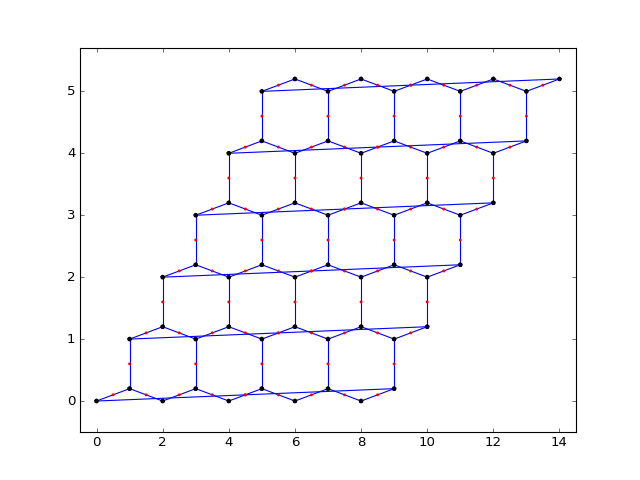

<IPython.core.display.Javascript object>


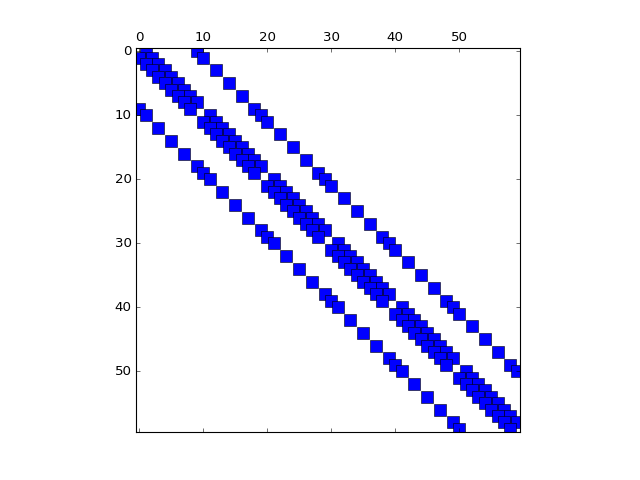

In [15]:
import Bryozoan as bryo
%matplotlib notebook
CrownsInPhalanx = 5
NumPhalanxes = 6
c1=bryo.Colony(nz=CrownsInPhalanx, mz=NumPhalanxes)
c1.colonyplot()

"""
Figure 1: Topology of the colony. Blue lines indicate edges (conduits) connecting interior nodes;
dark dots indicate edges (conduits) to the exterior node. Note the long blue lines where the left
and right edges wrap around (this is meant to simulate a cylinrical colony, but for clarity of
the topology it's flattened).

Figure 2: Spy plot of the incidence submatrix for the interior edges (not including the
conduits/edges to the exterior node).
"""

### 1) Explanation for $\ \mathbf {G = -B'CB} $

$\ c_{i,j} = 0 \text{ for } i \neq j \implies \sum_{j=0}^{z} c_{i,j}b_{j, l} = c_{i,i}b_{i, l} $

Therefore: $\ -\sum_{i=0}^{w} \sum_{j=0}^{z} b_{i,k}c_{i,j}b_{j, l} = -\sum_{i=0}^{w}  c_{i,i}b_{i,k}b_{i, l} $

For k=l this gives the (negative) of the sum of conductivities of edges: 

$\ b_{i,k} \in {-1,0,1} \implies b_{i,k}b_{i, k} \in {0, 1} $, so $\ k = l \implies -\sum_{i=0}^{w}  c_{i,i}b_{i,k}b_{i, l} = -\sum_{i \in D} c_{i,i} $, where D is the set of all edges that connect to node k. However, $\ -\sum_{i \in D} c_{i,i} = -\sum_{j=0}^{z} cn_{k, j} = g_{k,k} $

Assuming only one edge (edge d) connects each pair of nodes: $\ k \neq l \implies b_{i, k}b_{i,l} = \begin{cases} 0, & i \neq d \\ -1, & i=d \end{cases} $. 

Therefore: $\ k \neq l \implies -\sum_{i=0}^{w}  c_{i,i}b_{i,k}b_{i, l} = c_{d,d} = cn_{k,l} = g_{k,l} $

Hence: $\ g_{k,l} = -\sum_{i=0}^{w} \sum_{j=0}^{z} b_{i,k}c_{i,j}b_{j, l} $

Or, equivalently: $\ \mathbf{G = -B'CB} $

In [ ]:
import sympy
m, n = sympy.symbols('m n')
P = sympy.MatrixSymbol('P', m*n, 1)
Qin = sympy.MatrixSymbol('Qin', m*n, 1)
B = sympy.MatrixSymbol('B', n*(5*m-1)/2, m*n)
C = sympy.MatrixSymbol('C', n*(5*m-1)/2, n*(5*m-1)/2)
qtemp = (B.T)*C*B*P

In [ ]:
(B.T*B).inverse()*(B.T*(C.inverse()*((B*B.T).inverse()*(B*qtemp)))).doit()



In [ ]:
(B.T*B).inverse()*(B.T*(C.inverse()*((B*B.T).inverse()*(B*B.T))*C)*B)*P